In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


# Pretty plots
sns.set(style="whitegrid", context="notebook")


In [2]:
# Load the training set
train_df = pd.read_parquet("UNSW_NB15_training-set.parquet")

# Quick shape
print("Shape:", train_df.shape)
train_df.head()


Shape: (175341, 36)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,...,0,0,2,1,0,0,0,0,Normal,0


label
1    119341
0     56000
Name: count, dtype: int64

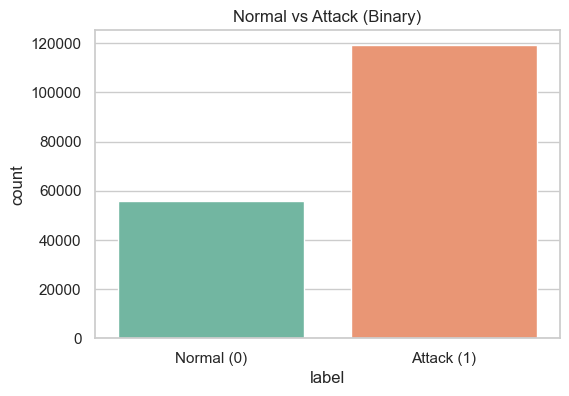

In [13]:

# 1️⃣ Binary Label Distribution
display(train_df["label"].value_counts())   # <- always shows table

plt.figure(figsize=(6,4))
sns.countplot(x="label", data=train_df, hue="label", legend=False, palette="Set2")
plt.title("Normal vs Attack (Binary)")
plt.xticks([0,1], ["Normal (0)", "Attack (1)"])
plt.show()


attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

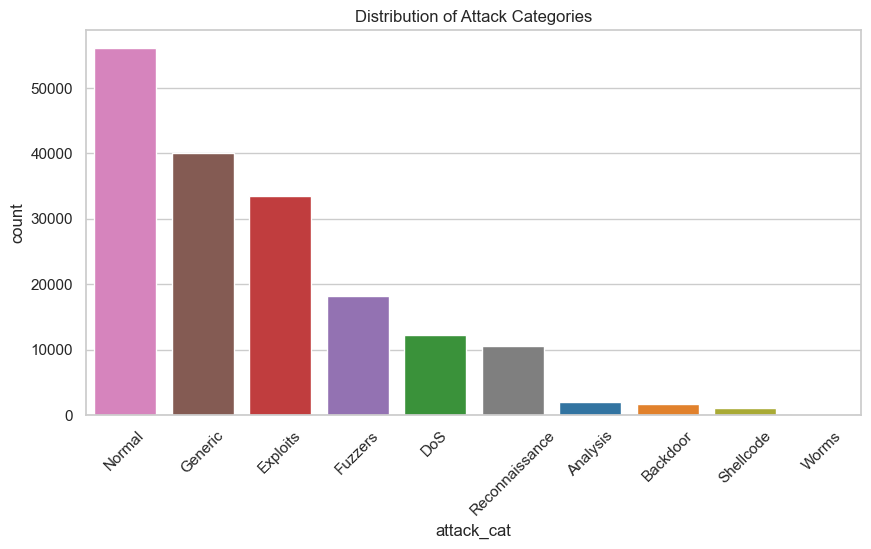

In [14]:
# 2️⃣ Attack Category Distribution
display(train_df["attack_cat"].value_counts())   # <- always shows table

plt.figure(figsize=(10,5))
sns.countplot(x="attack_cat", 
              data=train_df, 
              order=train_df["attack_cat"].value_counts().index,
              hue="attack_cat", legend=False, palette="tab10")
plt.title("Distribution of Attack Categories")
plt.xticks(rotation=45)
plt.show()


proto
tcp       79946
udp       63283
unas      12084
arp        2859
ospf       2595
sctp       1150
any         300
gre         225
swipe       201
mobile      201
pim         201
sun-nd      201
ipv6        201
rsvp        200
sep         193
Name: count, dtype: int64

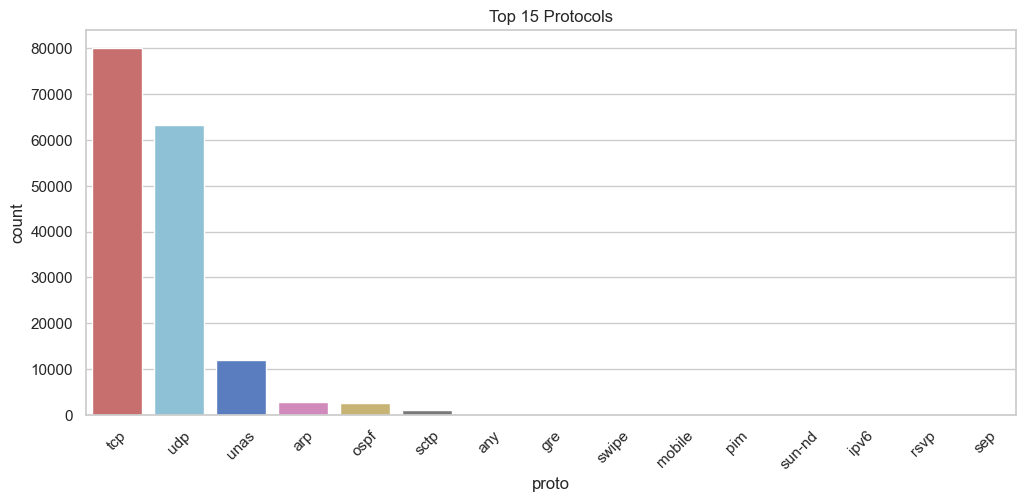

In [15]:
# 3️⃣ Protocol Distribution
display(train_df["proto"].value_counts().head(15))   # <- shows top protocols table

plt.figure(figsize=(12,5))
sns.countplot(x="proto", 
              data=train_df, 
              order=train_df["proto"].value_counts().head(15).index,
              hue="proto", legend=False, palette="muted")
plt.title("Top 15 Protocols")
plt.xticks(rotation=45)
plt.show()


service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
Name: count, dtype: int64

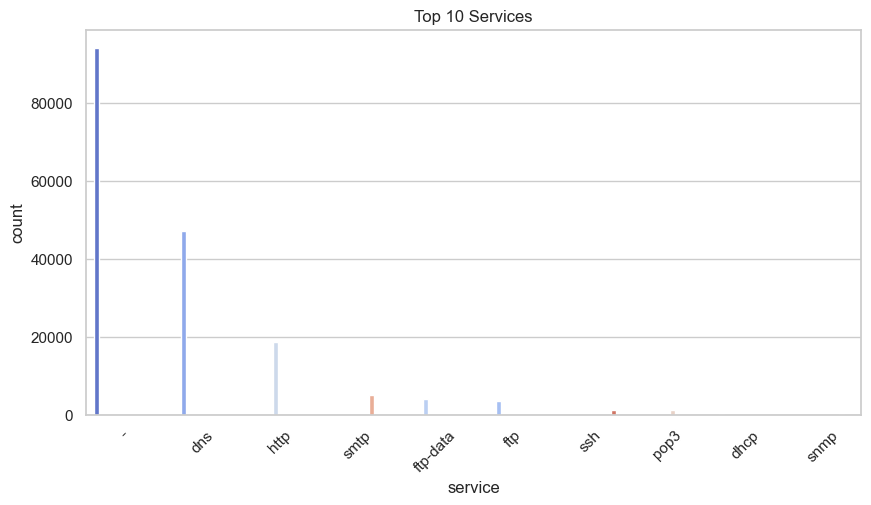

In [16]:
# 4️⃣ Service Distribution
top_services = train_df["service"].value_counts().head(10).index
display(train_df["service"].value_counts().head(10))   # <- shows table

plt.figure(figsize=(10,5))
sns.countplot(x="service", 
              data=train_df[train_df["service"].isin(top_services)], 
              order=top_services,
              hue="service", legend=False, palette="coolwarm")
plt.title("Top 10 Services")
plt.xticks(rotation=45)
plt.show()


In [17]:
print("Summary statistics (first 20 rows):")
display(train_df.describe(include="all").transpose().head(20))

print("\nMissing values per column:")
print(train_df.isna().sum().sort_values(ascending=False).head(15))


Summary statistics (first 20 rows):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dur,175341.0,NaN,NaN,NaN,1.359389,6.480249,0.0,0.000008,0.001582,0.668069,59.999989
proto,175341,133,tcp,79946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service,175341,13,-,94168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,175341,9,INT,82275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spkts,175341.0,NaN,NaN,NaN,20.298664,136.887597,1.0,2.0,2.0,12.0,9616.0
dpkts,175341.0,NaN,NaN,NaN,18.969591,110.258271,0.0,0.0,2.0,10.0,10974.0
sbytes,175341.0,NaN,NaN,NaN,8844.843836,174765.644309,28.0,114.0,430.0,1418.0,12965233.0
dbytes,175341.0,NaN,NaN,NaN,14928.918564,143654.217718,0.0,0.0,164.0,1102.0,14655550.0
rate,175341.0,NaN,NaN,NaN,95406.179688,165400.96875,0.0,32.78614,3225.806641,125000.0,1000000.0
sload,175341.0,NaN,NaN,NaN,73454032.0,188357440.0,0.0,13053.338867,879674.75,88888888.0,5988000256.0



Missing values per column:
dur        0
proto      0
service    0
state      0
spkts      0
dpkts      0
sbytes     0
dbytes     0
rate       0
sload      0
dload      0
sloss      0
dloss      0
sinpkt     0
dinpkt     0
dtype: int64
